In [1]:
__depends__=["../results/ebtel_varying_tau_results.pickle"]
__dest__="../results/f4.eps"

# Plot Temperature, Density, and Pressure State Space
Here, we show the state space plot for an EBTEL run where only the electrons are heated and the pulse duration, $\tau=200$ s.

In [2]:
import os
import sys
import pickle

import numpy as np
import astropy.constants as const
import seaborn.apionly as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

%matplotlib inline

In [3]:
plt.rcParams.update({'figure.figsize' : [8,8]})

Load in the EBTEL results.

In [4]:
with open(__depends__[0],'rb') as f:
    ebtel_results = pickle.load(f)

Build the plot.

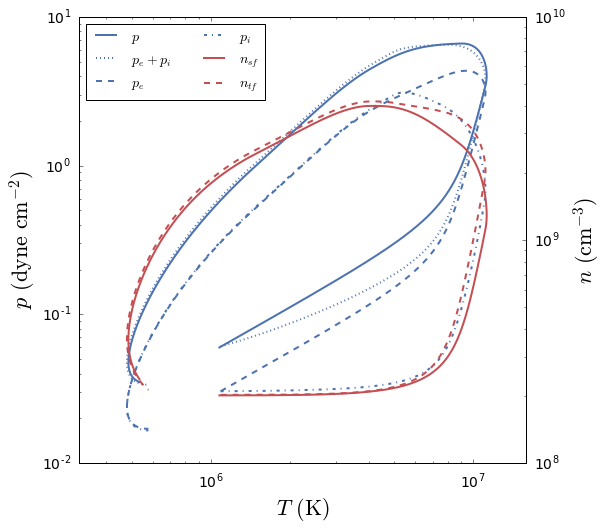

In [5]:
fig = plt.figure()
ax = fig.gca()
axn = ax.twinx()
#total pressure--single fluid
linep = ax.plot(ebtel_results[2]['T'],2.*const.k_B.cgs.value*ebtel_results[2]['n']*ebtel_results[2]['T'],
       color=sns.color_palette('deep')[0],linestyle='solid',label=r'$p$')
#total pressure--two fluid
linep_tot = ax.plot(ebtel_results[2]['Tee'],
        const.k_B.cgs.value*ebtel_results[2]['ne']*ebtel_results[2]['Tee']+const.k_B.cgs.value*ebtel_results[2]['ne']*ebtel_results[2]['Tei'],
       color=sns.color_palette('deep')[0],linestyle='dotted',label=r'$p_e+p_i$')
#electron pressure
linepe = ax.plot(ebtel_results[2]['Tee'],
        const.k_B.cgs.value*ebtel_results[2]['ne']*ebtel_results[2]['Tee'],
       color=sns.color_palette('deep')[0],linestyle='dashed',label=r'$p_e$')
#ion pressure
linepi = ax.plot(ebtel_results[2]['Tee'],
        const.k_B.cgs.value*ebtel_results[2]['ne']*ebtel_results[2]['Tei'],
       color=sns.color_palette('deep')[0],linestyle='-.',label=r'$p_i$')
#density--single-fluid
linensf = axn.plot(ebtel_results[2]['T'],ebtel_results[2]['n'],
       color=sns.color_palette('deep')[2],linestyle='solid',label=r'$n_{sf}$')
#density--two-fluid
linentf = axn.plot(ebtel_results[2]['Tee'],ebtel_results[2]['ne'],
       color=sns.color_palette('deep')[2],linestyle='dashed',label=r'$n_{tf}$')
#axes properties
#limits
ax.set_xlim([10**5.5,10**7.2])
axn.set_xlim([10**5.5,10**7.2])
#scale
ax.set_yscale('log')
axn.set_yscale('log')
ax.set_xscale('log')
axn.set_xscale('log')
#labels
ax.set_xlabel(r'$T$ $\mathrm{(K)}$')
ax.set_ylabel(r'$p$ $(\mathrm{dyne}$ $\mathrm{cm}^{-2})$')
axn.set_ylabel(r'$n$ $(\mathrm{cm}^{-3})$')
#legend
lines = linep + linep_tot + linepe + linepi + linensf + linentf
labels = []
[labels.append(l.get_label()) for l in lines]
ax.legend(lines,labels,loc=2,ncol=2)
#show
plt.savefig(__dest__)
plt.show()